In [1]:
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(1, 'models')
from q_voter_theoretical import *

In [2]:
Image_width = 10
plt.rc('text', usetex = True) # latex ticks
plt.rc('text.latex')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['Computer Modern'],
})

EXTRA_SMALL = 10
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=EXTRA_SMALL)         # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Figure 2

In [3]:
x_ax_limits = [0, 0.07]

k_L = 50
k_R = 150
q_a = 4
q_c = 10
P = np.linspace(0, 0.07, 500)
t = np.linspace(0, 1000,  1000)
IC = [0.999, 1 - 0.999]
SFP_L = PA_stable_fixed_points(P, t, k_L, q_a, q_c, IC)

upper_spinodal_L = SFP_L[0:-1][np.abs(np.diff(SFP_L)) == np.max(np.abs(np.diff(SFP_L)))][0]

C_L = np.linspace(0.5001, upper_spinodal_L, 10000)
IC_UFP = [0.055, 0.45]
UFP_L = PA_unstable_fixed_points(C_L, k_L, q_a, q_c, IC_UFP, interpolate = True)

MFA_results = MFA_equation(np.linspace(0.5001, 1, 10000), q_a, q_c)

SFP_R = PA_stable_fixed_points(P, t, k_R, q_a, q_c, IC)
upper_spinodal_R = SFP_R[0:-1][np.abs(np.diff(SFP_R)) == np.max(np.abs(np.diff(SFP_R)))][0]
C_R = np.linspace(0.5001, upper_spinodal_R, 10000)
UFP_R = PA_unstable_fixed_points(C_R, k_R, q_a, q_c, IC_UFP, interpolate = True)

c:\Users\andrz\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


(0.0, 0.07)

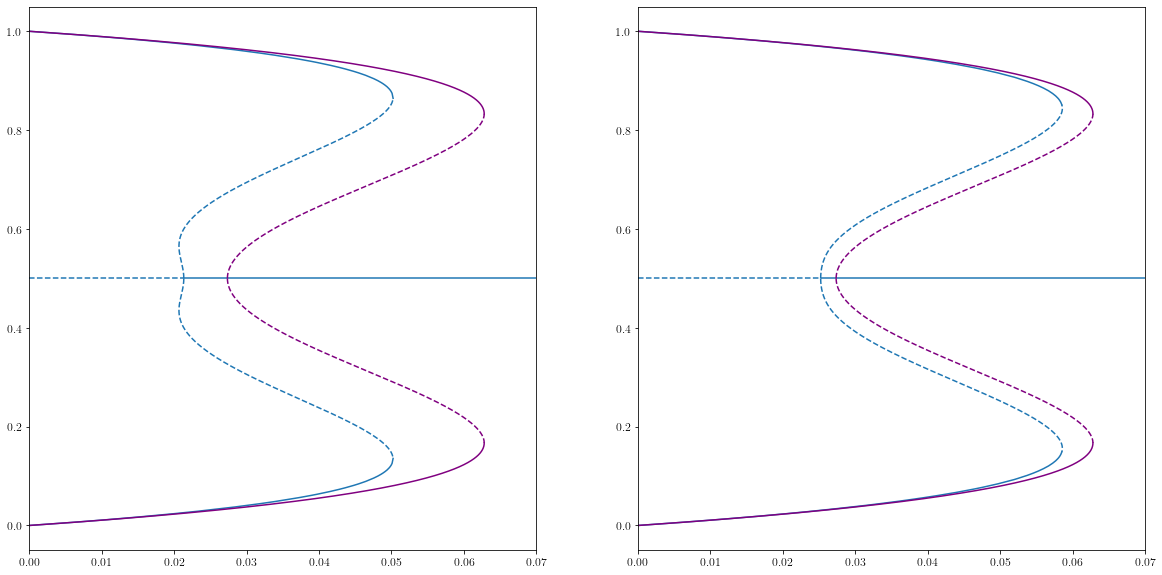

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize = (2 * Image_width, Image_width))

ax = axs[0]
# PA
# upper part
ax.plot(UFP_L, C_L, '--')
ax.plot(P[SFP_L >= upper_spinodal_L], SFP_L[SFP_L >= upper_spinodal_L], color = ax.get_lines()[-1].get_c())
ax.hlines(y = 0.5, xmin = x_ax_limits[0], xmax = UFP_L[0], linestyles = '--')
ax.hlines(y = 0.5, xmin = UFP_L[0], xmax = x_ax_limits[1])
# lower part
ax.plot(UFP_L, 1 - C_L, '--', color = ax.get_lines()[-1].get_c())
ax.plot(P[SFP_L >= upper_spinodal_L], 1 - SFP_L[SFP_L >= upper_spinodal_L], color = ax.get_lines()[-1].get_c())
# MFA
# upper part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
# lower part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], 1 - np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], 1 - np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
ax.set_xlim(x_ax_limits)

ax = axs[1]
# PA
# upper part
ax.plot(UFP_R, C_R, '--')
ax.plot(P[SFP_R >= upper_spinodal_R], SFP_R[SFP_R >= upper_spinodal_R], color = ax.get_lines()[-1].get_c())
ax.hlines(y = 0.5, xmin = x_ax_limits[0], xmax = UFP_R[0], linestyles = '--')
ax.hlines(y = 0.5, xmin = UFP_R[0], xmax = x_ax_limits[1])
# lower part
ax.plot(UFP_R, 1 - C_R, '--', color = ax.get_lines()[-1].get_c())
ax.plot(P[SFP_R >= upper_spinodal_R], 1 - SFP_R[SFP_R >= upper_spinodal_R], color = ax.get_lines()[-1].get_c())
# MFA
# upper part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
# lower part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], 1 - np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], 1 - np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
ax.set_xlim(x_ax_limits)

# Figure 3

In [ ]:
x_ax_limits = [0.34, 0.45]

k_L = 50
k_R = 150
q_a = 10
q_c = 10
IC_UFP = [0.38, 0.45]
C = np.linspace(0.5001, 0.7, 10000)

SUFP_L = PA_unstable_fixed_points(C, k_L, q_a, q_c, IC_UFP, interpolate = True)
upper_spinodal_L = np.nanmax(SUFP_L)

SUFP_R = PA_unstable_fixed_points(C, k_R, q_a, q_c, IC_UFP, interpolate = True)
upper_spinodal_R = np.nanmax(SUFP_R)

MFA_results = MFA_equation(np.linspace(0.5001, 1, 10000), q_a, q_c)

(0.3, 0.7)

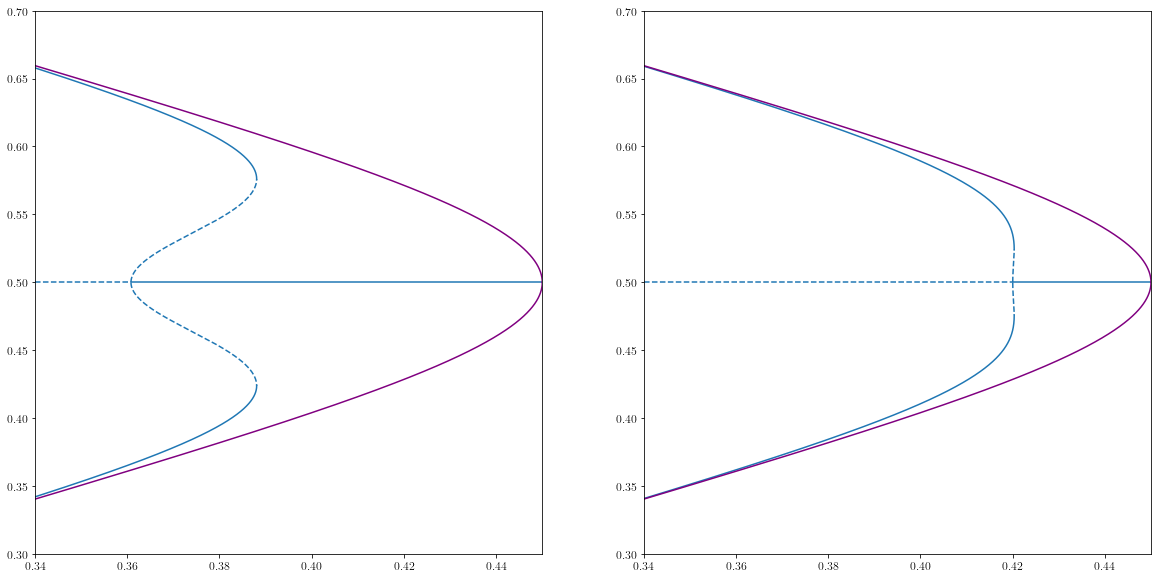

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize = (2 * Image_width, Image_width))

ax = axs[0]
# PA
# upper part
ax.plot(SUFP_L[:np.nanargmax(SUFP_L)], C[:np.nanargmax(SUFP_L)], '--')
ax.plot(SUFP_L[np.nanargmax(SUFP_L):], C[np.nanargmax(SUFP_L):], color = ax.get_lines()[-1].get_c())
ax.hlines(y = 0.5, xmin = x_ax_limits[0], xmax = SUFP_L[0], linestyles = '--')
ax.hlines(y = 0.5, xmin = SUFP_L[0], xmax = x_ax_limits[1])
# lower part
ax.plot(SUFP_L[:np.nanargmax(SUFP_L)], 1 - C[:np.nanargmax(SUFP_L)], '--', color = ax.get_lines()[-1].get_c())
ax.plot(SUFP_L[np.nanargmax(SUFP_L):], 1- C[np.nanargmax(SUFP_L):], color = ax.get_lines()[-1].get_c())
# MFA
# upper part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
# lower part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], 1 - np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], 1 - np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
ax.set_xlim(x_ax_limits)
ax.set_ylim([0.3, 0.7])

ax = axs[1]
# PA
# upper part
ax.plot(SUFP_R[:np.nanargmax(SUFP_R)], C[:np.nanargmax(SUFP_R)], '--')
ax.plot(SUFP_R[np.nanargmax(SUFP_R):], C[np.nanargmax(SUFP_R):], color = ax.get_lines()[-1].get_c())
ax.hlines(y = 0.5, xmin = x_ax_limits[0], xmax = SUFP_R[0], linestyles = '--')
ax.hlines(y = 0.5, xmin = SUFP_R[0], xmax = x_ax_limits[1])
# lower part
ax.plot(SUFP_R[:np.nanargmax(SUFP_R)], 1 - C[:np.nanargmax(SUFP_R)], '--', color = ax.get_lines()[-1].get_c())
ax.plot(SUFP_R[np.nanargmax(SUFP_R):], 1- C[np.nanargmax(SUFP_R):], color = ax.get_lines()[-1].get_c())
# MFA
# upper part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
# lower part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], 1 - np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], 1 - np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
ax.set_xlim(x_ax_limits)
ax.set_ylim([0.3, 0.7])

# Figure 5

In [ ]:
x_ax_limits = [0.755, 0.85]

k_L = 50
k_R = 150
q_a = 13
q_c = 10
IC_UFP = [0.38, 0.45]
C = np.linspace(0.5001, 0.7, 10000)

SUFP_L = PA_unstable_fixed_points(C, k_L, q_a, q_c, IC_UFP)
upper_spinodal_L = np.nanmax(SUFP_L)

SUFP_R = PA_unstable_fixed_points(C, k_R, q_a, q_c, IC_UFP)
upper_spinodal_R = np.nanmax(SUFP_R)

MFA_results = MFA_equation(np.linspace(0.5001, 1, 10000), q_a, q_c)

(0.35, 0.65)

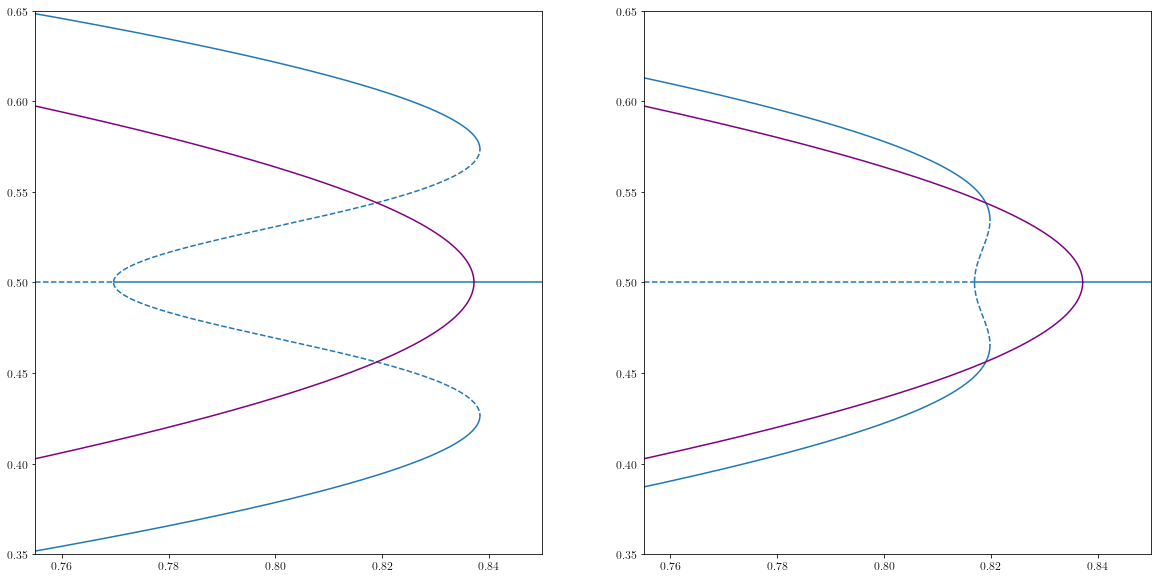

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize = (2 * Image_width, Image_width))

ax = axs[0]
# PA
# upper part
ax.plot(SUFP_L[:np.nanargmax(SUFP_L)], C[:np.nanargmax(SUFP_L)], '--')
ax.plot(SUFP_L[np.nanargmax(SUFP_L):], C[np.nanargmax(SUFP_L):], color = ax.get_lines()[-1].get_c())
ax.hlines(y = 0.5, xmin = x_ax_limits[0], xmax = SUFP_L[0], linestyles = '--')
ax.hlines(y = 0.5, xmin = SUFP_L[0], xmax = x_ax_limits[1])
# lower part
ax.plot(SUFP_L[:np.nanargmax(SUFP_L)], 1 - C[:np.nanargmax(SUFP_L)], '--', color = ax.get_lines()[-1].get_c())
ax.plot(SUFP_L[np.nanargmax(SUFP_L):], 1- C[np.nanargmax(SUFP_L):], color = ax.get_lines()[-1].get_c())
# MFA
# upper part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
# lower part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], 1 - np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], 1 - np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
ax.set_xlim(x_ax_limits)
ax.set_ylim([0.35, 0.65])

ax = axs[1]
# PA
# upper part
ax.plot(SUFP_R[:np.nanargmax(SUFP_R)], C[:np.nanargmax(SUFP_R)], '--')
ax.plot(SUFP_R[np.nanargmax(SUFP_R):], C[np.nanargmax(SUFP_R):], color = ax.get_lines()[-1].get_c())
ax.hlines(y = 0.5, xmin = x_ax_limits[0], xmax = SUFP_R[0], linestyles = '--')
ax.hlines(y = 0.5, xmin = SUFP_R[0], xmax = x_ax_limits[1])
# lower part
ax.plot(SUFP_R[:np.nanargmax(SUFP_R)], 1 - C[:np.nanargmax(SUFP_R)], '--', color = ax.get_lines()[-1].get_c())
ax.plot(SUFP_R[np.nanargmax(SUFP_R):], 1- C[np.nanargmax(SUFP_R):], color = ax.get_lines()[-1].get_c())
# MFA
# upper part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
# lower part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], 1 - np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], 1 - np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
ax.set_xlim(x_ax_limits)
ax.set_ylim([0.35, 0.65])